# __01 Data Visualization with ggplot2__

In [1]:
library(ggplot2)
library(tibble)
library(tidyr)
library(readr)
library(purrr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
?mpg

mpg {ggplot2},R Documentation


In [5]:
mpg %>%
    head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


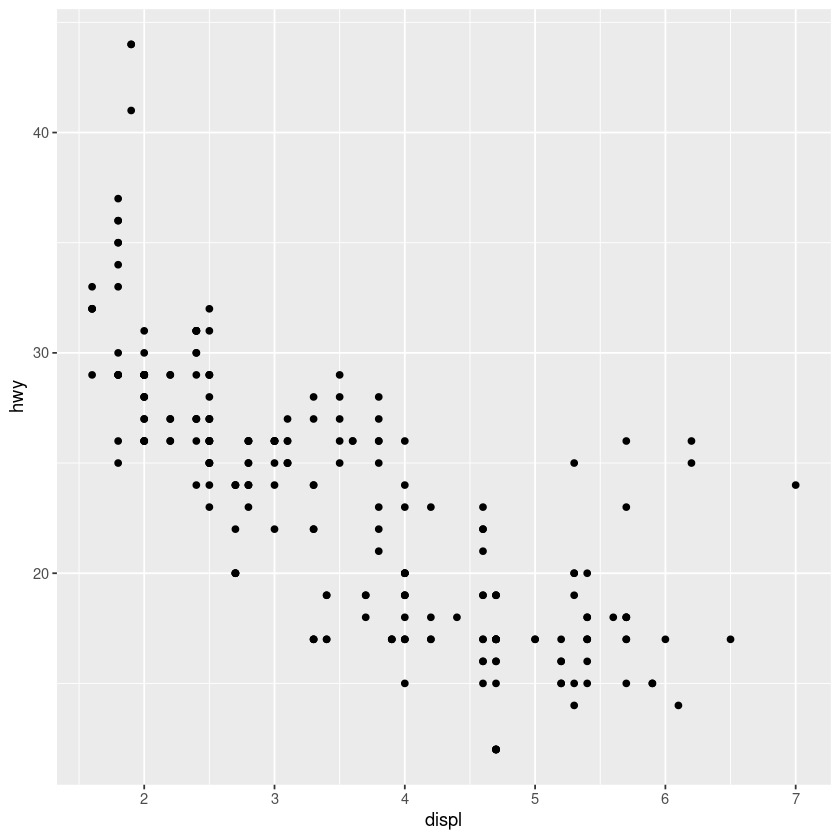

In [7]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size ( displ )
and fuel efficiency ( hwy ). In other words, cars with big engines use
more fuel. Does this confirm or refute your hypothesis about fuel
efficiency and engine size?

You complete your graph by adding one or more layers to ggplot() .
The function geom_point() adds a layer of points to your plot,
which creates a scatterplot. ggplot2 comes with many geom func‐
tions that each add a different type of layer to a plot. You’ll learn a
whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a mapping argument. This
defines how variables in your dataset are mapped to visual proper‐
ties. The mapping argument is always paired with aes() , and the x
and y arguments of aes() specify which variables to map to the x-
and y-axes. ggplot2 looks for the mapped variable in the data argu‐
ment, in this case, mpg .

Let’s turn this code into a reusable template for making graphs with
ggplot2. To make a graph, replace the bracketed sections in the fol‐
lowing code with a dataset, a geom function, or a collection of map‐
pings:
```r
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

An aesthetic is a visual prop‐
erty of the objects in your plot. Aesthetics include things like the
size, the shape, or the color of your points. You can display a point
(like the one shown next) in different ways by changing the values of
its aesthetic properties. Since we already use the word “value” to
describe data, let’s use the word “level” to describe aesthetic proper‐
ties. Here we change the levels of a point’s size, shape, and color to
make the point small, triangular, or blue,

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset.

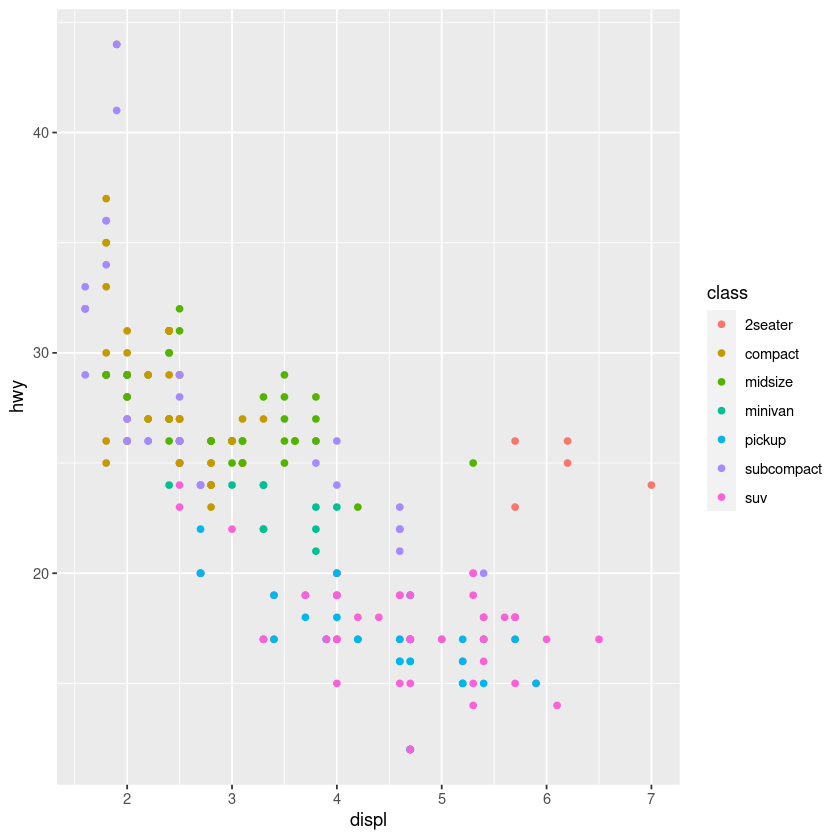

In [9]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

__T o map an aesthetic to a variable, associate the name of the aesthetic to the name of the varible inside__ `aes()`

ggplot2 will automatically
assign a unique level of the aesthetic (here a unique color) to each
unique value of the variable, a process known as scaling. ggplot2 will
also add a legend that explains which levels correspond to which
values.

We could have mapped class to the size aesthetic in the same
way. In this case, the exact size of each point would reveal its class
affiliation. We get a warning here, because mapping an unordered
variable ( class ) to an ordered aesthetic ( size ) is not a good idea:

Warning message:
“Using size for a discrete variable is not advised.”


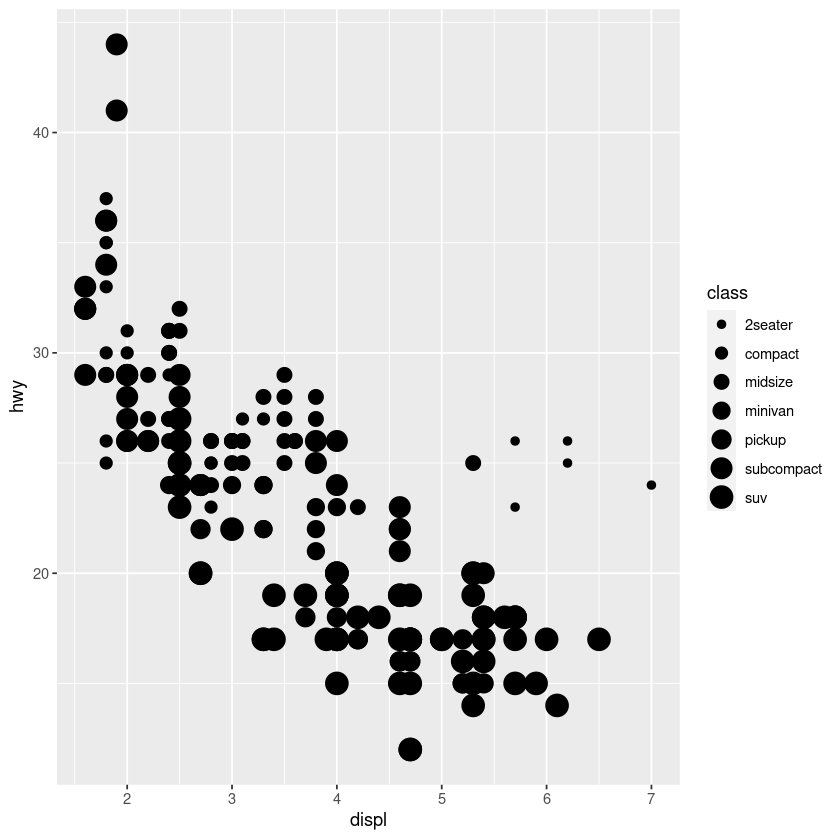

In [10]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = class))

Or we could have mapped class to the alpha aesthetic, which controls the transparency of the points, or the shape of the points:


Warning message:
“Using alpha for a discrete variable is not advised.”


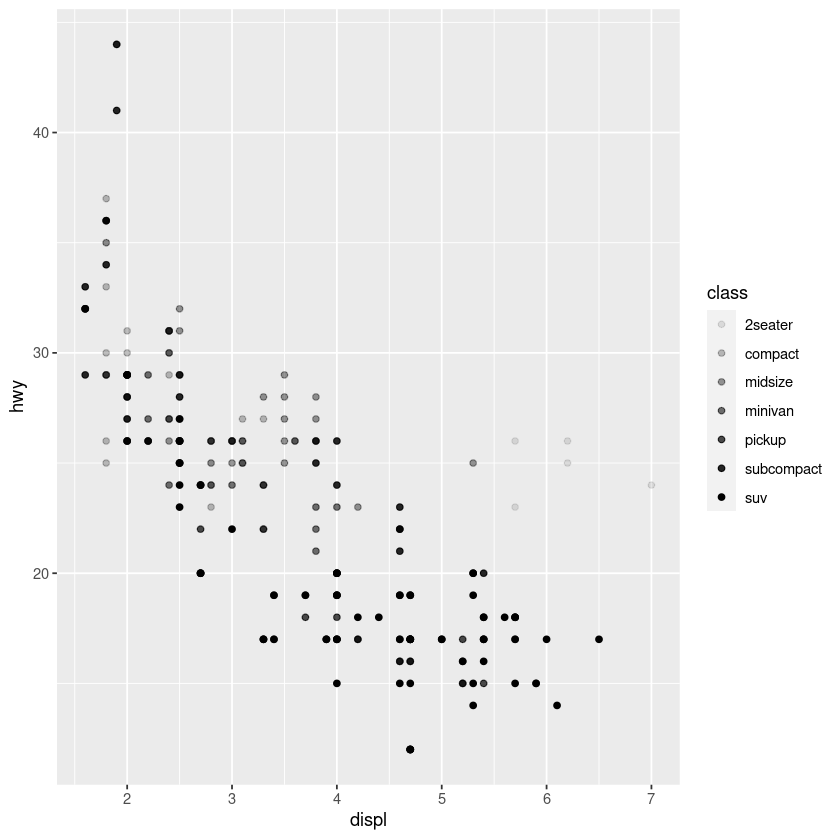

In [12]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


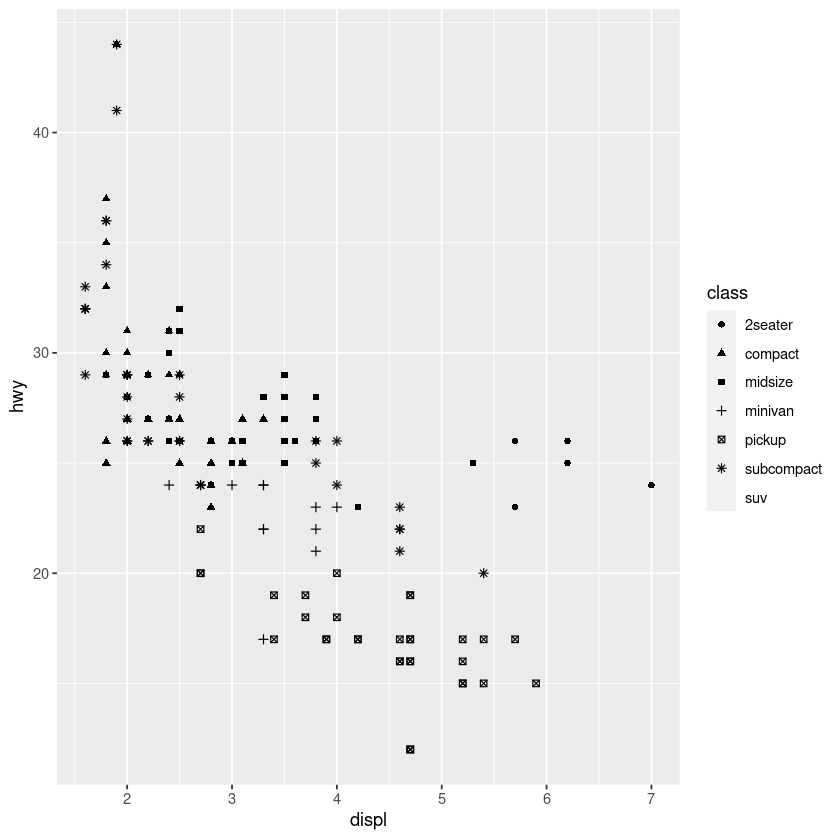

In [13]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, shape = class))